In [2]:
import numpy as np
import pandas as pd
import os


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving income_evaluation.csv to income_evaluation.csv


In [5]:
df = pd.read_csv("income_evaluation.csv")

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
df.shape

(32561, 15)

In [10]:
df['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)

In [11]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [12]:
stats = df.select_dtypes(['float', 'int64']).drop(columns=['income'])

Text(0.5, 1.0, 'Correlation Factors Heat Map')

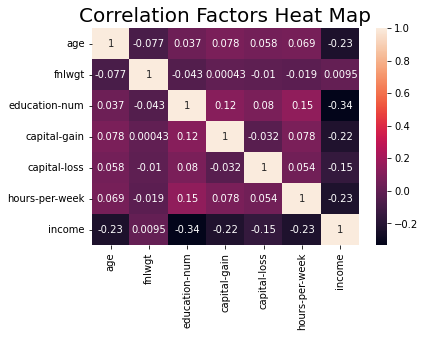

In [13]:
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [14]:
df_final = pd.get_dummies(df)
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = df_final.drop(columns=['income'])
y = df_final['income']

In [17]:
from sklearn.model_selection import train_test_split
# Instantiate object
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.neighbors import KNeighborsClassifier
# Train object on data
ss.fit(X)

# Trandform data
X = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [19]:
y_pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1353, 1003],
       [ 741, 6672]])

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, y_pred)

0.8214760978605794

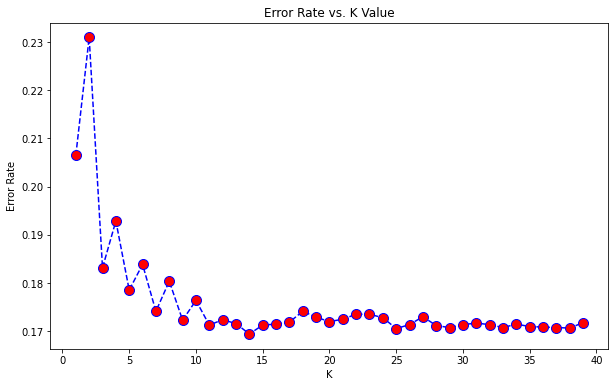

Minimum error:- 0.1694134507114341 at K = 14


In [23]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [24]:
knn = KNeighborsClassifier(n_neighbors=14, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

In [25]:
y_pred = knn.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)


0.8305865492885659

Decision Tree


In [27]:
ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)

In [28]:
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.8141058450199611

In [29]:
fi = ct.feature_importances_
fi

array([1.25910981e-01, 1.86840066e-01, 9.87103756e-02, 1.01926629e-01,
       3.68152676e-02, 6.79537186e-02, 1.26749374e-03, 5.12655353e-03,
       7.85304865e-03, 0.00000000e+00, 1.03893988e-02, 5.34065355e-03,
       7.76894798e-03, 4.92494563e-03, 0.00000000e+00, 8.05868521e-04,
       9.81819430e-04, 6.86264560e-05, 1.00140083e-04, 4.65410750e-04,
       3.80117466e-04, 1.51840228e-04, 7.45567706e-04, 2.96674864e-03,
       1.42506220e-03, 3.44024801e-04, 5.72427975e-03, 1.69683523e-03,
       0.00000000e+00, 7.37939490e-04, 1.99782983e-03, 3.22066782e-03,
       1.68391914e-04, 1.93034137e-01, 1.10233342e-04, 2.64561300e-03,
       6.26351619e-04, 9.32811384e-04, 9.18213643e-04, 5.59072647e-03,
       0.00000000e+00, 8.61226917e-03, 9.99301574e-03, 2.90965602e-03,
       2.57710680e-03, 4.38376397e-03, 4.52686116e-03, 0.00000000e+00,
       8.32425997e-03, 4.41042571e-03, 7.00071691e-03, 2.30718837e-03,
       6.17416527e-03, 2.02969403e-03, 2.49163444e-03, 1.11332236e-03,
      

In [30]:
list(zip(df.columns, fi))

[('age', 0.12591098130007325),
 ('workclass', 0.1868400662192555),
 ('fnlwgt', 0.09871037556870596),
 ('education', 0.10192662913169112),
 ('education-num', 0.036815267582863666),
 ('marital-status', 0.06795371856507154),
 ('occupation', 0.001267493740283968),
 ('relationship', 0.005126553525018083),
 ('race', 0.007853048653971679),
 ('sex', 0.0),
 ('capital-gain', 0.010389398813632288),
 ('capital-loss', 0.005340653546076943),
 ('hours-per-week', 0.007768947978317025),
 ('native-country', 0.004924945630491477),
 ('income', 0.0)]

RandomForest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [33]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8532091309243526
